references: https://www.youtube.com/watch?v=9wmImImmgcI&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=11
https://www.kaggle.com/datasets/filippoo/deep-learning-az-ann

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('customer_attrition.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

##### Dropping irrelevant columns

In [7]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### We see that no null values present

In [10]:
# checking for dupliacte rows
df.duplicated().sum()

0

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### We see imbalance in classification

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
#one hot encoding the categorical values
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


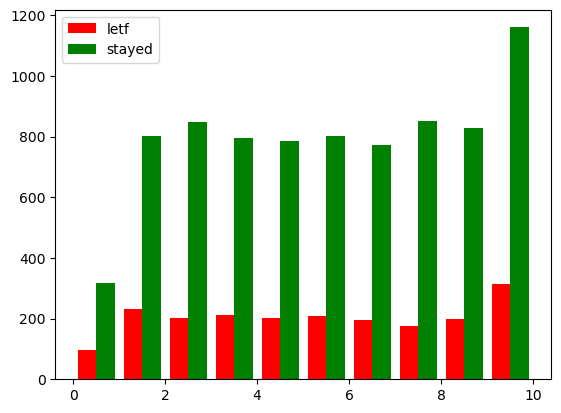

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
tenure_left=df[df.Exited==1].Tenure
tenure_stay=df[df.Exited==0].Tenure
plt.hist([tenure_left,tenure_stay],color=['red','green'],label=['letf','stayed'])
plt.legend()

In [18]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [35]:
X.shape

(10000, 11)

In [40]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [41]:
X_val.shape, X_test.shape, y_val.shape

((1000, 11), (1000, 11), (1000,))

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [44]:
model1 = Sequential()

model1.add(Dense(128,activation='relu',input_dim=11))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [45]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model1.fit(X_train,y_train,batch_size=36,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
178/178 [==============================] - 2s 5ms/step - loss: 191.1270 - accuracy: 0.6702 - val_loss: 146.4326 - val_accuracy: 0.2206
Epoch 2/50
178/178 [==============================] - 0s 3ms/step - loss: 94.6987 - accuracy: 0.6775 - val_loss: 34.4522 - val_accuracy: 0.7456
Epoch 3/50
178/178 [==============================] - 0s 3ms/step - loss: 69.6068 - accuracy: 0.6791 - val_loss: 71.7812 - val_accuracy: 0.6181
Epoch 4/50
178/178 [==============================] - 0s 3ms/step - loss: 59.2600 - accuracy: 0.6850 - val_loss: 117.6298 - val_accuracy: 0.4744
Epoch 5/50
178/178 [==============================] - 0s 2ms/step - loss: 59.3752 - accuracy: 0.6789 - val_loss: 77.5452 - val_accuracy: 0.7681
Epoch 6/50
178/178 [==============================] - 0s 3ms/step - loss: 48.0419 - accuracy: 0.6833 - val_loss: 23.1115 - val_accuracy: 0.7969
Epoch 7/50
178/178 [==============================] - 0s 3ms/step - loss: 37.7289 - accuracy: 0.6833 - val_loss: 57.6707 - val_accura

In [50]:
y_pred = model1.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

32/32 [==============================] - 0s 1ms/step


0.785

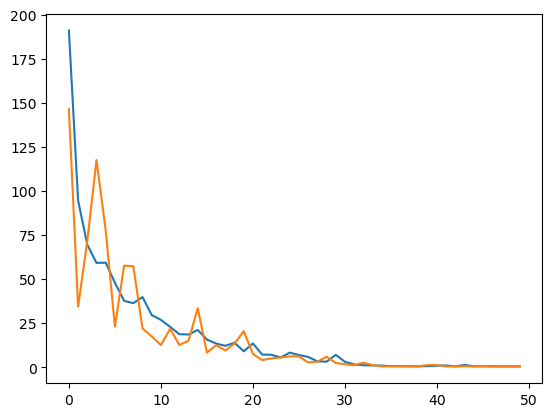

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

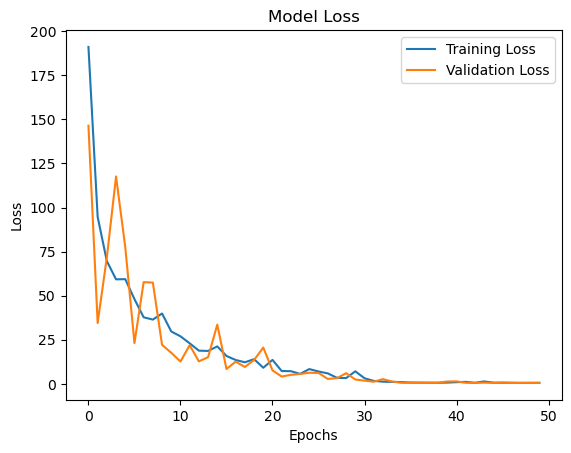

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [66]:
ypred=model1.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [74]:
y_pred=[];
for i in ypred:
    if(i>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)
        

<Axes: >

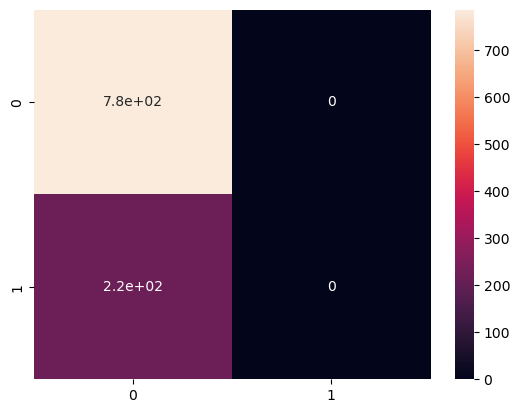

In [80]:
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
sm=confusion_matrix(y_test,y_pred)
sns.heatmap(sm,annot=True)

#### Helps us decide the number of epochs, here when the validation loss shows an upward spike after the decrease is where we have to stop. We do not want our model to learn too much from the train data and result in overfitting.

### inference:
- in this loss vs epoch graph. The training and validation losses decrease and converge at a similar loss, hence it is an ideal architecture.

In [81]:
model = Sequential()

model.add(Dense(15,activation='sigmoid',input_dim=11))
model.add(Dense(22,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 15)                180       
                                                                 
 dense_8 (Dense)             (None, 22)                352       
                                                                 
 dense_9 (Dense)             (None, 1)                 23        
                                                                 
Total params: 555 (2.17 KB)
Trainable params: 555 (2.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(X_train,y_train,batch_size=36,epochs=5,verbose=1,validation_split=0.2)

Epoch 1/5
178/178 [==============================] - 2s 3ms/step - loss: 0.5248 - accuracy: 0.7934 - val_loss: 0.4999 - val_accuracy: 0.7987
Epoch 2/5
178/178 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7934 - val_loss: 0.4972 - val_accuracy: 0.7987
Epoch 3/5
178/178 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7934 - val_loss: 0.4961 - val_accuracy: 0.7987
Epoch 4/5
178/178 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7934 - val_loss: 0.4930 - val_accuracy: 0.7987
Epoch 5/5
178/178 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7934 - val_loss: 0.4922 - val_accuracy: 0.7987


In [85]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [86]:
y_pred

array([[0.25219226],
       [0.14747664],
       [0.14747664],
       [0.23744896],
       [0.14747664],
       [0.14747664],
       [0.22060245],
       [0.14747664],
       [0.23744896],
       [0.25219226],
       [0.25219226],
       [0.14747664],
       [0.24175298],
       [0.14747664],
       [0.25570622],
       [0.22060245],
       [0.22060245],
       [0.258899  ],
       [0.14747664],
       [0.22060245],
       [0.14747664],
       [0.24175298],
       [0.22060245],
       [0.22060245],
       [0.14747664],
       [0.24175298],
       [0.24175298],
       [0.14747664],
       [0.14747664],
       [0.22060245],
       [0.14747664],
       [0.258899  ],
       [0.22060245],
       [0.23744896],
       [0.14747664],
       [0.24175298],
       [0.22060245],
       [0.258899  ],
       [0.14747664],
       [0.14747664],
       [0.24175298],
       [0.14747664],
       [0.14747664],
       [0.14747664],
       [0.14747664],
       [0.25219226],
       [0.25219226],
       [0.237

In [87]:
y_pred = y_pred.argmax(axis=-1)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.785

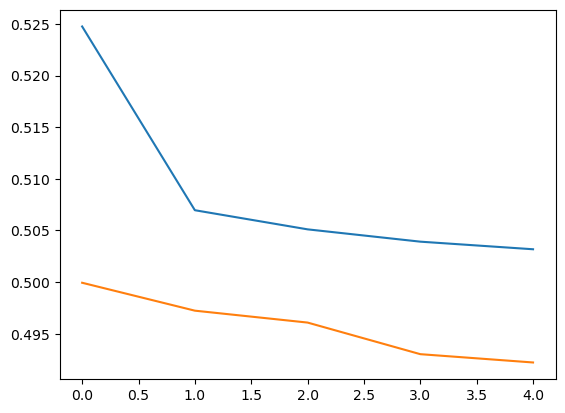

In [89]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

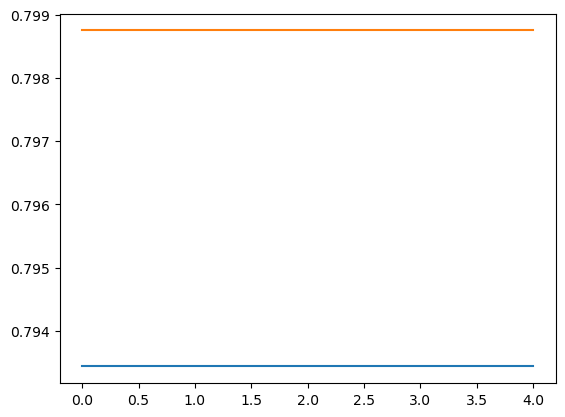

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])